# Data Collection & Preprocessing
Dataset used: https://github.com/xiaohuicui/WAID
1018 × 572 pixels (original) and 640 x 640 pixels in dataset
Labelling tool used: https://github.com/HumanSignal/labelImg
Yolo format: [class_id] [x_center] [y_center] [width] [height]
7:2:1 split for train, validation and test

In [1]:
import pathlib
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from collections import defaultdict

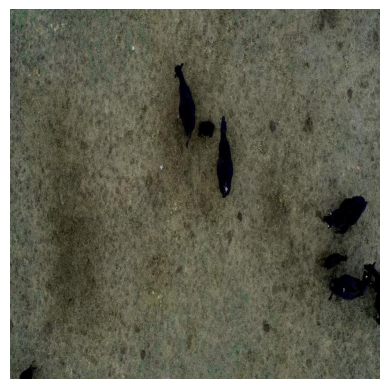

In [2]:
# Load the dataset
data_root = pathlib.Path("../data/WAID")

# let's load one train image and its corresponding label
train_image = list(data_root.glob("images/train/*.jpg"))[0]
# Load the image
image = Image.open(train_image)
plt.imshow(image)
plt.axis('off')
plt.show()
# get name of the image
image_name = train_image.name[:-4]

In [3]:
print("Image size: ", image.size)

Image size:  (640, 640)


In [4]:
# Let's load the class names
with open(data_root / "classes.txt", "r") as f:
    classes = f.readlines()
classes = [c.strip() for c in classes]
classes

['sheep', 'cattle', 'seal', 'camelus', 'kiang', 'zebra']

In [5]:
# Load the label
with open(data_root / "labels/train" / f"{image_name}.txt", "r") as f:
    label = f.readlines()
label = pd.DataFrame([l.strip().split() for l in label], dtype=float)
label.columns = ["class_id", "x_center", "y_center", "width", "height"]
label["class_id"] = label["class_id"].astype(int)
label["class_name"] = label["class_id"].apply(lambda x: classes[x])
label

,class_id,x_center,y_center,width,height,class_name
0,1,0.907813,0.562500,0.118750,0.159375,cattle
1,1,0.581250,0.400000,0.040625,0.220312,cattle
2,1,0.529687,0.326562,0.046875,0.043750,cattle
3,1,0.470313,0.260937,0.056250,0.231250,cattle
4,1,0.873437,0.685156,0.075000,0.053125,cattle
5,1,0.917969,0.751563,0.112500,0.078125,cattle
6,1,0.978125,0.767188,0.040625,0.165625,cattle


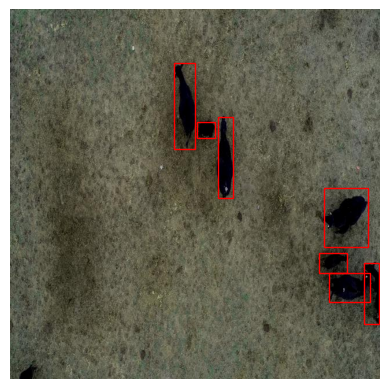

In [6]:
# Let's plot the bounding box on the image
fig, ax = plt.subplots()
ax.imshow(image)
for i, row in label.iterrows():
    x_center = row["x_center"] * image.size[0]
    y_center = row["y_center"] * image.size[1]
    width = row["width"] * image.size[0]
    height = row["height"] * image.size[1]
    x1 = x_center - width / 2
    y1 = y_center - height / 2
    rect = plt.Rectangle((x1, y1), width, height, fill=False, color="red")
    ax.add_patch(rect)
plt.axis('off')
plt.show()

In [16]:
# class imbalances in the train data
train_labels = list(data_root.glob("labels/train/*.txt"))
class_counts = defaultdict(int)
for label_file in train_labels:
    with open(label_file, "r") as f:
        label = f.readlines()
    label = [l.strip().split()[0] for l in label]
    for class_id in label:
        class_counts[int(class_id)] += 1

cattle: 44245
sheep: 91496
seal: 15762
camelus: 4676
zebra: 3792
kiang: 3312


<BarContainer object of 6 artists>

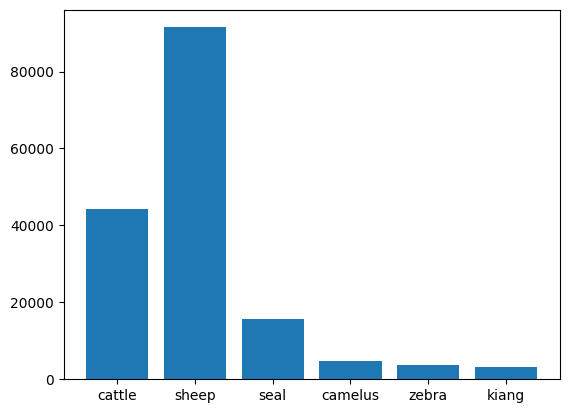

In [17]:
# print class counts with class names
for class_id, count in class_counts.items():
    print(f"{classes[class_id]}: {count}")
# bar plot it
plt.bar([classes[class_id] for class_id in class_counts.keys()], class_counts.values())